<a href="https://colab.research.google.com/github/Malikarbaaz/YES_BANK_CLOSE_PRICE_PREDICTION/blob/main/Yes_Bank_MLProject_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title :-  </u></b> <b> YES BANK STOCK CLOSING PRICE PREDICTION. <b>

#**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the |bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.** 


In [101]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [102]:
# Mounting google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
# Importing Dataset
file_path = '/content/drive/MyDrive/Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices.csv'

In [104]:
# Reading our Dataset
data = pd.read_csv(file_path)

In [105]:
# head gives the top 5 rows of the given dataset
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [106]:
# tail gives the bottom 5 rows of the given dataset
data.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


# **DATA DESCRIPTION**
 ### We have the YES BANK Stock price dataset which has the monthly stock prices of the bank since its opening. The data contains of the following features:

 * **Date:** Date denotes the date of investment( in our data date contains month and year for a particular price)
 * **Open:** Open means the price at which a stock started trading.
 * **High:** The high is the highest price at which a stock traded during a period.
 * **Low:** The low is the minimum price at which a stock traded during a period.
 * **Close:** The closing price refers to a stock's trading price closed at the end of a trading day.

In [107]:
#info() print the basic information of our DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


### **Here our date features is of object dtype, so the date column needs to be converted into a date time format. Also the given Date  is of format MMM-YY is needs to be converted to proper date format of YYYY-MM-DD**

In [108]:
data.Date.head()

0    Jul-05
1    Aug-05
2    Sep-05
3    Oct-05
4    Nov-05
Name: Date, dtype: object

In [109]:
# importing datetime and converting 'Date' into datetime - YYYY-MM-DD
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))      

In [110]:
#set date as index
data.set_index('Date',inplace=True)

In [111]:
data.head(3)

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30


In [112]:
# Creating a copy of dataframe
df = data.copy()

### **Here we creating a copy of dataframe because whatever we applying a conditions on the given data so that it doesn't affect our original dataset.**

In [113]:
# describe() gives the overall descriptive summary of the dataframe
df.describe().transpose()        # transpose() convert the column to row and row to column.

,count,mean,std,min,25%,50%,75%,max
Open,185.0,105.541405,98.879850,10.00,33.80,62.98,153.00,369.95
High,185.0,116.104324,106.333497,11.24,36.14,72.55,169.19,404.00
Low,185.0,94.947838,91.219415,5.55,28.51,58.00,138.35,345.50
Close,185.0,105.204703,98.583153,9.98,33.45,62.54,153.30,367.90


In [114]:
#  Shape give the total number of rows and columns
print('Rows {}  Columns {}'.format(data.shape[0], data.shape[1]))

Rows 185  Columns 4


In [115]:
# Checking the total null values in our dataset.
df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [116]:
# Checking the totol number of duplicate values 
len(df[df.duplicated()])

0

### **As we see there are no null values also there are no duplicate values in our given dataset.**

In [117]:
# Checking every column has similar rows/values by using count() function
df.count()

Open     185
High     185
Low      185
Close    185
dtype: int64

In [118]:
# Creating a new variable and store the column in that variable
numeric_features = df.columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

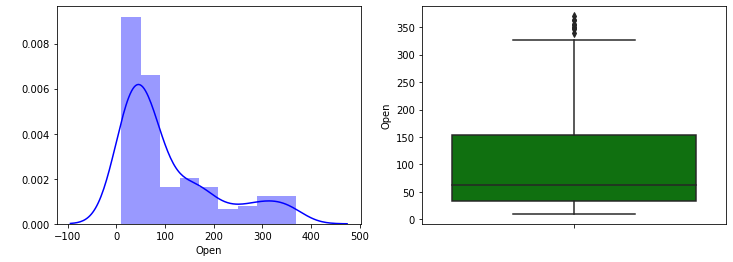

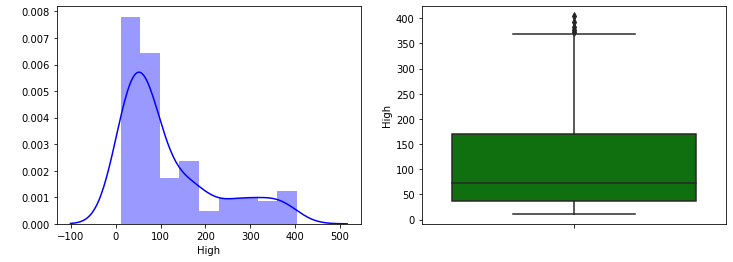

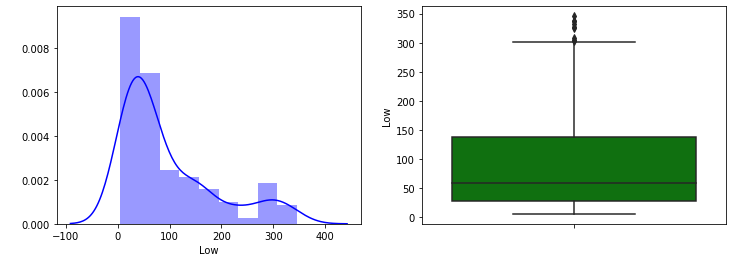

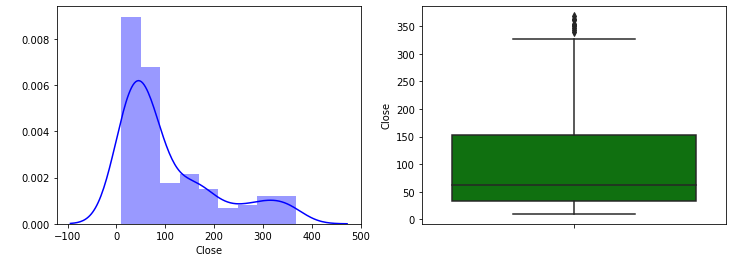

In [119]:
#plots histogram for numerical variables
for var in numeric_features:
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df[var], color="blue")
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

# plotting boxplot to see the outliers
    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=df[var], color="green")
    fig.set_title('')
    fig.set_ylabel(var)

## **it is positively skewed**

###**when you looking this graph, this is not a perfect normal distribution, so we have to apply some kind of transformation to see it will look like a normal distribution or not.**

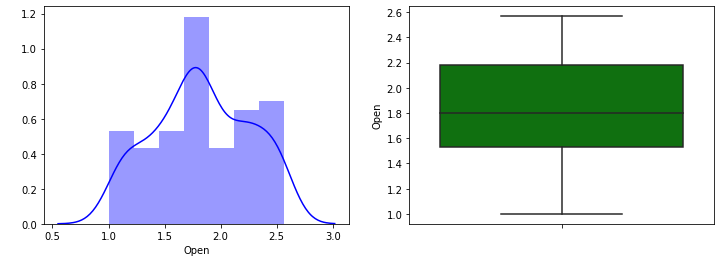

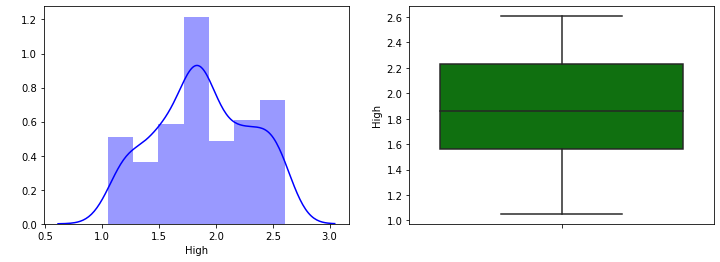

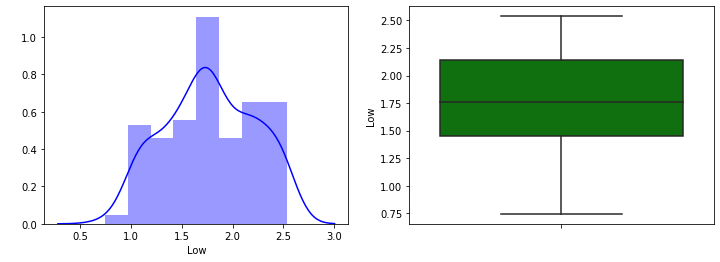

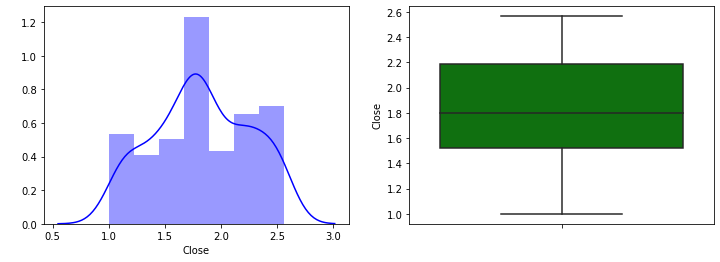

In [120]:
#Using log transform
for var in numeric_features:
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(df[var]), color="blue")
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

# plotting boxplot to see the outliers are there or not.
    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(df[var]), color="green")           
# numpy log10() is a mathematical function that is used to get the natural logarithm of any object or an array with the base 10                          
    fig.set_title('')
    fig.set_ylabel(var)

##**it is not perfectly normal distribution but more or less its looking normal distribution.**

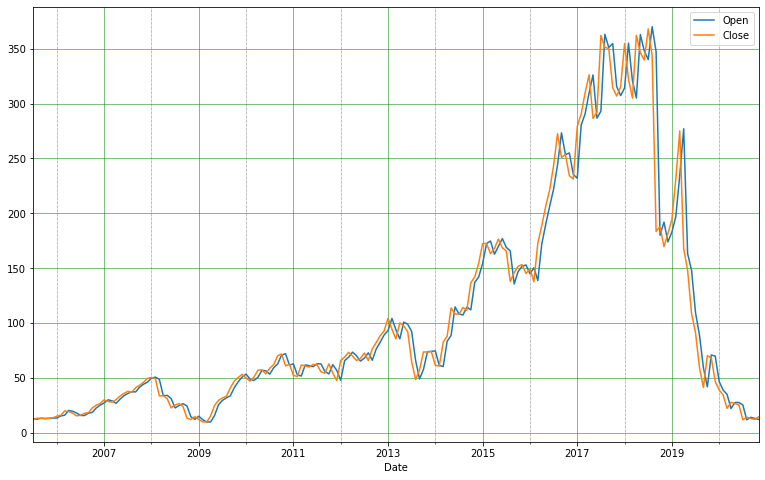

In [121]:
#Plot Open vs Close
df[['Open','Close']].iloc[:].plot(kind='line',figsize=(13,8))        
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

##**The line graph shows that the stock price of yes bank was actually fall from 2018 onwards which shows the impact of 2018 fraud case involving Rana Kapoor for which it has been in the news.**

In [122]:
# Date of maximum closing price
print('Maximum closing price:\n', df[df['Close']== df['Close'].max()])

# Date of minimum closing price
print('\n Minimum closing price:\n',df[df['Close']== df['Close'].min()])

Maximum closing price:
              Open    High     Low  Close
Date                                    
2018-07-01  340.0  393.35  332.45  367.9

 Minimum closing price:
             Open   High   Low  Close
Date                                
2009-03-01  10.0  11.24  8.16   9.98


## **Creating independent and dependent variables**
* **Independent variables : [ 'Open', 'High', 'Low' ]**
* **Dependent variable : [ 'Close' ]**


In [123]:
# Creating a dependent variable i.e 'y'
dependent_variable = 'Close'

# Create a list of independent variables i.e x1,x2,x3,.....xn
# Pandas tolist() is used to convert a series to list.
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['Open', 'High', 'Low']

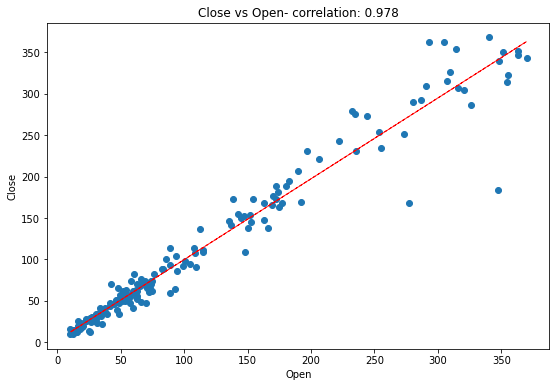

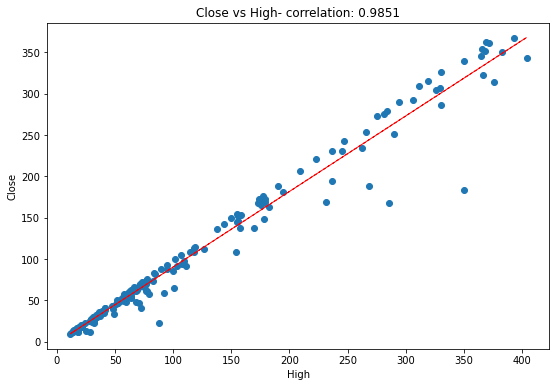

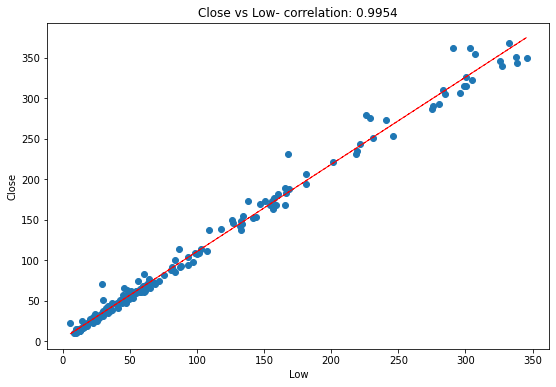

In [124]:
# Scatterplot between independent and dependent variable
for col in df.columns[:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(round((correlation),4)))    #here col is an independent_variables and,
    z = np.polyfit(df[col], df['Close'], 1)                                              #we added correlation also so that how much my correlation is the data
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

## **We can clearly say that all the independent variables are linearly affecting of our dependent variable that means there is a strong correlation between all the independent variables.**

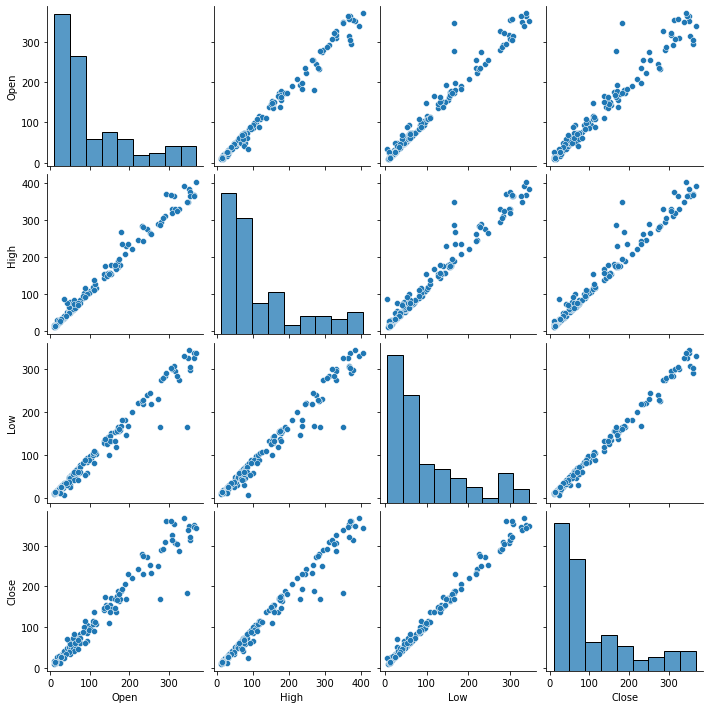

In [125]:
# Plotting the entire dataframe using pairplot. This will plot each column of our df with every other column.
sns.pairplot(df)

## **Now, let see more better correlation values between all the features in our dataset by using heatmap.**

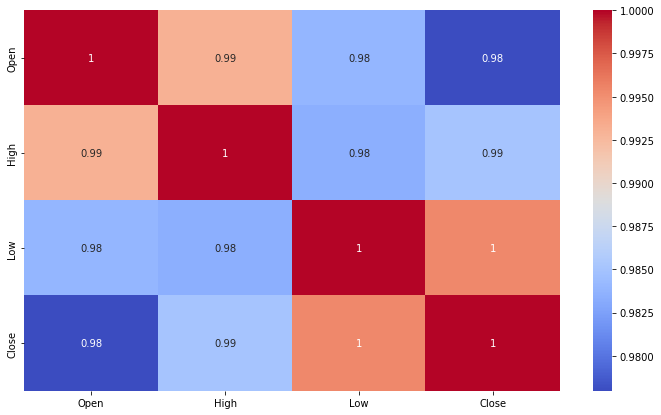

In [126]:
# Checking Correlation 
plt.figure(figsize=(12,7))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

## **By seeing the heatmap we conclude that there is a high multicollinearity between each independent column.**  

In [127]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor   #here we importing VIF which is used for measure the amount of multicollinearity
def calc_vif(X):

    # Calculating VIF score
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [128]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date']]])

,variables,VIF
0,Open,288.504853
1,High,323.952468
2,Low,424.612257
3,Close,428.401649


## **Here we see that we have very high VIF score which means there is a high multicollinearity between these variables (the VIF score should be below 10 indicates  the more reliable your regression results are going to be.)**
## **Even we have high VIF score we cannot drop any feature because each vaiable is important in perspective of regression analysis.**

In [129]:
# Create a variable to predict 'n' Months for future
future_months = 3

###**We are training our models to predict prices of future by n months. Just we make a one way of predicton here.**

In [130]:
# Create a column 'Prediction' and shift 'n' Months for future prediction
df['Prediction'] = df[['Close']].shift(-future_months)               # Shift() Function shifts index by the desired number of periods
df.head(10)

,Open,High,Low,Close,Prediction
Date,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.99
2005-08-01,12.58,14.88,12.55,13.42,13.41
2005-09-01,13.48,14.87,12.27,13.30,13.71
2005-10-01,13.20,14.47,12.40,12.99,15.33
2005-11-01,13.35,13.88,12.88,13.41,16.12
2005-12-01,13.49,14.44,13.00,13.71,20.08
2006-01-01,13.68,17.16,13.58,15.33,19.49
2006-02-01,15.50,16.97,15.40,16.12,18.03
2006-03-01,16.20,20.95,16.02,20.08,15.62


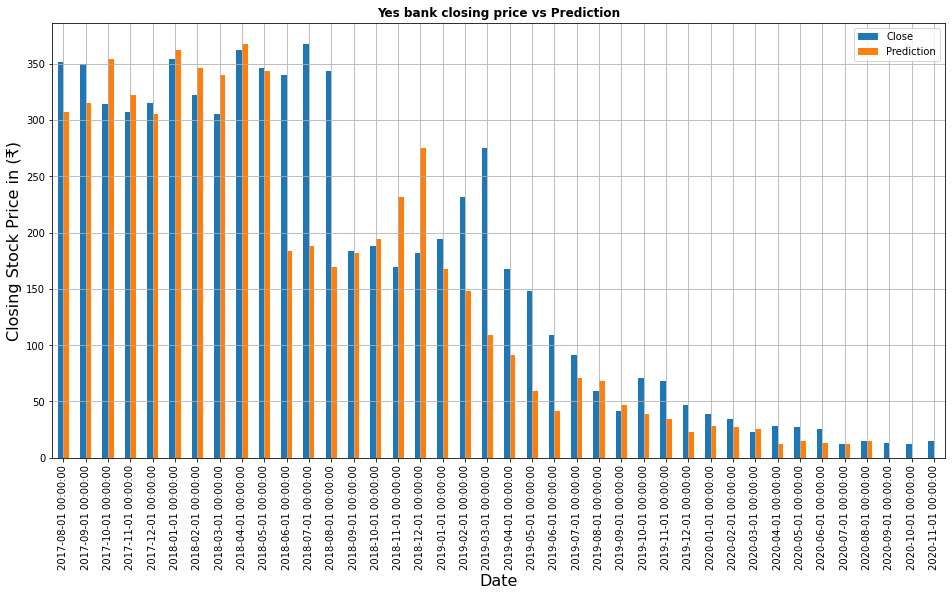

In [131]:
#Closing price vs prediction
df[['Close','Prediction']].tail(40).plot(kind='bar',figsize=(16,8))                  
plt.grid(True)                                                        
plt.title('Yes bank closing price vs Prediction',fontweight = 'bold')
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Closing Stock Price in (₹)',fontsize = 16)
plt.show()

## **Here I am creating an empty dataframe for storing an evolution metrics for each regression model so that to compare  which model will give best result.**

In [132]:
#Creating empty data frame for each regression model 
i=0
evaluation_matrix = pd.DataFrame()

#**Modelling**
### **We will build three models**
* **Linear Regression**
* **Lasso Regression**
* **Ridge Regression**
* **ElasticNet Regression**

# **LINEAR REGRESSION**

In [133]:
#Importing libraries
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [134]:
#applying zscore to each values of independent variable 
from scipy.stats import zscore            #zscore make your data normalize by putting mean as 0 and std deviation as 1.
X = df[independent_variables].apply(zscore)

In [135]:
#applying log on dependent variable 
y = np.log10(df['Close'])

In [136]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [137]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (148, 3)
X_test: (37, 3)
y_train: (148,)
y_test: (37,)


In [138]:
#Applying Linear Regression
Lr = LinearRegression()

In [139]:
#Fitting Multiple Linear Regression to the Training set
regressor = Lr.fit(X_train, y_train)              #inside this function fit() it will calculate loss,try multiple lines,
                                                  #gradient descent,finding the optimal values and ultimately it will gives the best fit line.

In [140]:
#Checking efficiency of training model
regressor.score(X_train,y_train)

0.8090973296947443

In [141]:
regressor.intercept_       #  this is intercept i.e beta0

1.8262354887187733

In [142]:
regressor.coef_            # this is coefficient i.e beta 1,2,3,4,5,6.......till beta n

array([-0.13212634,  0.2897523 ,  0.2329089 ])

In [143]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred              #Predicting closing day on the test data

array([1.53271165, 1.96685151, 1.61036375, 1.95591371, 1.66701732,
       1.53307377, 2.32010906, 1.47235081, 1.46198661, 2.27176343,
       2.59774191, 1.77196865, 2.00437373, 1.63989847, 2.73572843,
       2.44737489, 1.69461712, 1.51604264, 2.45270911, 1.61168007,
       1.44552783, 1.87477595, 2.01565305, 1.63782509, 2.25504837,
       1.63485715, 2.42543822, 1.46033686, 1.83193344, 1.62300074,
       2.8808576 , 2.77557818, 1.6959313 , 2.07184242, 1.56166337,
       1.59651659, 2.42252489])

In [144]:
# Actual closing day on test data
y_test

Date
2008-04-01    1.532245
2015-12-01    2.162056
2019-12-01    1.671636
2014-11-01    2.152533
2010-08-01    1.793930
2007-01-01    1.479431
2016-12-01    2.364101
2006-02-01    1.207365
2005-12-01    1.137037
2019-01-01    2.288473
2018-03-01    2.484157
2019-07-01    1.960471
2015-11-01    2.185542
2011-06-01    1.795045
2018-06-01    2.530968
2019-03-01    2.439412
2010-10-01    1.856487
2008-08-01    1.428621
2017-01-01    2.445760
2010-01-01    1.697578
2009-03-01    0.999131
2014-09-01    2.048053
2019-05-01    2.170115
2010-07-01    1.770778
2016-06-01    2.344981
2019-10-01    1.847881
2016-09-01    2.399414
2005-11-01    1.127429
2014-07-01    2.034267
2011-01-01    1.720903
2018-08-01    2.535800
2017-07-01    2.558661
2012-09-01    1.883321
2015-03-01    2.213013
2007-09-01    1.616581
2010-02-01    1.675045
2016-10-01    2.404012
Name: Close, dtype: float64

In [145]:
# comparing actual and predicted closing price on the test dataset
compare_df = pd.DataFrame({'Actual_Price': y_test,'Predicted_Price': y_pred})

In [146]:
compare_df.head(10)

,Actual_Price,Predicted_Price
Date,,
2008-04-01,1.532245,1.532712
2015-12-01,2.162056,1.966852
2019-12-01,1.671636,1.610364
2014-11-01,2.152533,1.955914
2010-08-01,1.793930,1.667017
2007-01-01,1.479431,1.533074
2016-12-01,2.364101,2.320109
2006-02-01,1.207365,1.472351
2005-12-01,1.137037,1.461987


In [147]:
regressor.score(X_test,y_test)

0.8283441092652581

In [148]:
#Calculating MAE, MSE, RMSE, R^2, Adjusted R^2
MAE = round(mean_absolute_error((y_test),(y_pred)),3)
print("MAE :", MAE)

MSE = round(mean_squared_error((y_test),(y_pred)),3)
print("MSE :", MSE)

RMSE = round(np.sqrt(MSE),3)
print("RMSE :", RMSE)

R2 = round(r2_score((y_test), (y_pred)),3)
print("R2 :" , R2)

Adjusted_R2 = round(1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2:", Adjusted_R2) 

MAE : 0.146
MSE : 0.032
RMSE : 0.179
R2 : 0.828
Adjusted R2: 0.813


In [149]:
# Inserting errors in empty dataframe which I have created
# for Linear regression
evaluation_matrix.loc[i,"Model_Name"]='Linear regression'
evaluation_matrix.loc[i,"MSE"]=round(MSE,4)
evaluation_matrix.loc[i,"RMSE"]=round(RMSE,4)
evaluation_matrix.loc[i,"R2"]=round(R2,4)
evaluation_matrix.loc[i,"Adjusted R2"]=round(Adjusted_R2,4)

i+=1

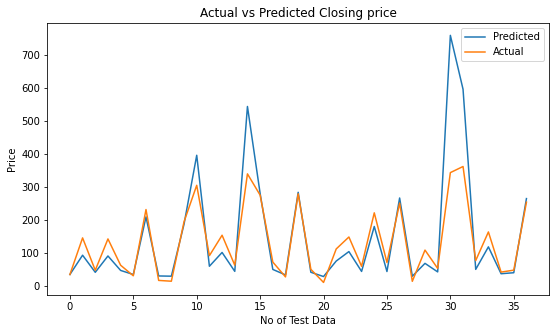

In [150]:
#actual-predicted values plot
plt.figure(figsize=(9,5))
plt.plot(10**y_pred)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price")
plt.show()

# **LASSO REGRESSION**

In [151]:
from sklearn.linear_model import Lasso        # Importing lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)        

Lasso(alpha=0.0001, max_iter=3000)

In [152]:
# calculating score
lasso.score(X_train, y_train)

0.8090760725255433

In [153]:
print(lasso.coef_)

[-0.11377464  0.27425867  0.22988438]


In [154]:
# Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,0.0014]}  
# alpha is the hyperparameter which we wanted to tuned and inside we give some random values   
                                                                                  
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)   #this GridSearchCV try each of the values of alpha 

lasso_regressor.fit(X_train, y_train)                                                       #cv=5 means we dividing our data into 5 folds  

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 0.0014]},
             scoring='neg_mean_squared_error')

## **Cross Validation :** In cross validation we divide our data into 3 parts training, validation and testing. The testing data is only for the final check, train and validation is used for the hyper parameter tuning in order to avoid the data leakage.  

##**here my total alpha values is 18 and i give crossvalidation to 5 i.e cv =5...... which means our model will run 90 times [18*5=90]......this is called  GridSearchCV**







In [155]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -0.03537118949620511


## **best_params will give you the best values of alpha from all those combination** 

In [156]:
y_pred_lasso = lasso_regressor.predict(X_test)
print(y_pred_lasso)

[1.53721476 1.98003203 1.62372449 1.95926328 1.66334641 1.5309664
 2.32760845 1.47524932 1.46544692 2.22718758 2.61800545 1.78605273
 2.00967999 1.6443834  2.7565546  2.41301448 1.696589   1.51675653
 2.41229162 1.61523884 1.44887563 1.87217391 2.01805138 1.63614929
 2.25106476 1.60711814 2.43318649 1.46422824 1.83576342 1.63212407
 2.87177132 2.70878732 1.69075687 2.07961532 1.56291751 1.60077785
 2.42577522]


Text(0.5, 1.0, 'Actual vs Predicted Closing price')

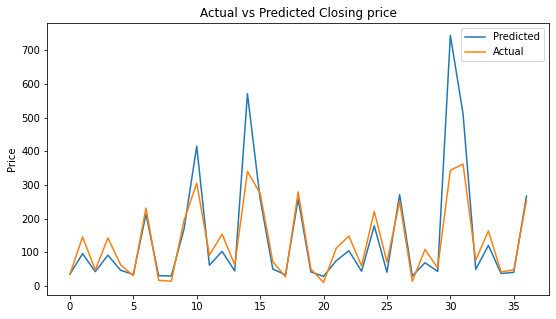

In [157]:
#actual vs y_pred_lasso values plot
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_lasso)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price")

In [158]:
MSE  = round(mean_squared_error((y_test),(y_pred_lasso)),4)
print("MSE :" , MSE)

RMSE = round(np.sqrt(MSE),4)
print("RMSE :" ,RMSE)

r2 = round(r2_score((y_test), (y_pred_lasso)),4)
print("R2 :" ,r2)
print("Adjusted R2 : ",round(1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MSE : 0.0317
RMSE : 0.178
R2 : 0.8296
Adjusted R2 :  0.8141


In [159]:
# Inserting errors in empty dataframe which I have created
# for Lasso regression
evaluation_matrix.loc[i,"Model_Name"]='Lasso regression'
evaluation_matrix.loc[i,"MSE"]=round(MSE,4)
evaluation_matrix.loc[i,"RMSE"]=round(RMSE,4)
evaluation_matrix.loc[i,"R2"]=round(R2,4)
evaluation_matrix.loc[i,"Adjusted R2"]=round(Adjusted_R2,4)

i+=1

# **RIDGE REGRESSION**

In [160]:
from sklearn.linear_model import Ridge    # importing Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [161]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.03559106404507476


In [162]:
y_pred_ridge = ridge_regressor.predict(X_test)

Text(0.5, 1.0, 'Actual vs Predicted Closing price')

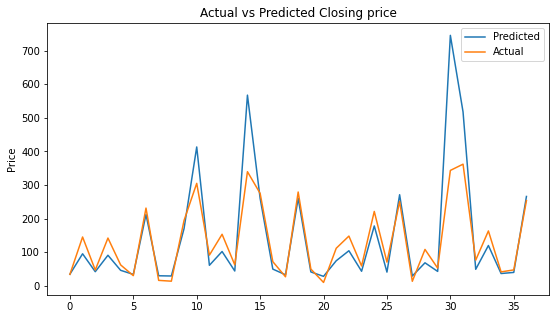

In [163]:
#actual vs y_pred_ridge values plot
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_ridge)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price")

In [164]:
MSE  = round(mean_squared_error((y_test),(y_pred_ridge)),4)
print("MSE :" , MSE)

RMSE = round(np.sqrt(MSE),4)
print("RMSE :" ,RMSE)

r2 = round(r2_score((y_test), (y_pred_ridge)),4)
print("R2 :" ,r2)
print("Adjusted R2 :",round(1-(1-r2_score(y_test,y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MSE : 0.0317
RMSE : 0.178
R2 : 0.8298
Adjusted R2 : 0.8143


In [165]:
# Inserting errors in empty dataframe which I have created
# for Ridge regression
evaluation_matrix.loc[i,"Model_Name"]='Ridge regression'
evaluation_matrix.loc[i,"MSE"]=round(MSE,4)
evaluation_matrix.loc[i,"RMSE"]=round(RMSE,4)
evaluation_matrix.loc[i,"R2"]=round(R2,4)
evaluation_matrix.loc[i,"Adjusted R2"]=round(Adjusted_R2,4)

i+=1

# **ELASTICNET REGRESSION**

In [166]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [167]:
# fitting the train model
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [168]:
elasticnet.score(X_train, y_train)

0.7867631296535167

In [169]:
elasticnet.intercept_

1.821587750108441

In [170]:
elasticnet.coef_

array([0.07655659, 0.11567873, 0.13714533])

In [171]:
y_pred_en = elasticnet.predict(X_test)

In [172]:
MSE  = round(mean_squared_error((y_test),(y_pred_en)),4)
print("MSE :" , MSE)

RMSE = round(np.sqrt(MSE),4)
print("RMSE :" ,RMSE)

r2 = round(r2_score((y_test), (y_pred_en)),4)
print("R2 :" ,r2)
print("Adjusted R2 :",round(1-(1-r2_score(y_test,y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MSE : 0.0344
RMSE : 0.1855
R2 : 0.8155
Adjusted R2 : 0.7988


In [173]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [174]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.4}

Using  {'alpha': 0.01, 'l1_ratio': 0.4}  the negative mean squared error is:  -0.035176857455740486


In [175]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [176]:
MSE  = round(mean_squared_error((y_test),(y_pred_elastic)),4)
print("MSE :" , MSE)

RMSE = round(np.sqrt(MSE),4)
print("RMSE :" ,RMSE)

r2 = round(r2_score((y_test), (y_pred_elastic)),4)
print("R2 :" ,r2)
print("Adjusted R2 :",round(1-(1-r2_score(y_test, y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MSE : 0.0316
RMSE : 0.1778
R2 : 0.8304
Adjusted R2 : 0.815


In [177]:
# Inserting errors in empty dataframe which I have created
# for ElasticNet regression
evaluation_matrix.loc[i,"Model_Name"]='ElasticNet regression'
evaluation_matrix.loc[i,"MSE"]=round(MSE,4)
evaluation_matrix.loc[i,"RMSE"]=round(RMSE,4)
evaluation_matrix.loc[i,"R2"]=round(R2,4)
evaluation_matrix.loc[i,"Adjusted R2"]=round(Adjusted_R2,4)

i+=1

Text(0.5, 1.0, 'Actual vs Predicted Closing price')

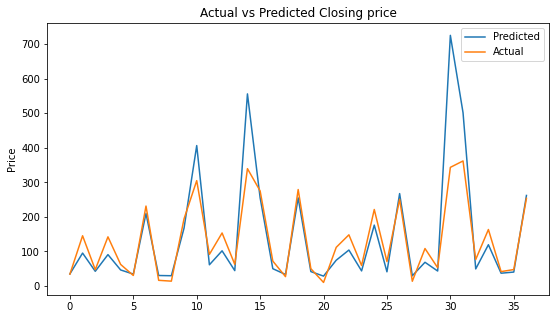

In [178]:
#actual vs y_pred_elastic values plot
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_elastic)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price")

In [179]:
#sorting metrics and comparing result for each regression
evaluation_matrix.sort_values(by=['MSE'],ascending=False,inplace=True)

In [180]:
evaluation_matrix

,Model_Name,MSE,RMSE,R2,Adjusted R2
0,Linear regression,0.0320,0.1790,0.828,0.813
1,Lasso regression,0.0317,0.1780,0.828,0.813
2,Ridge regression,0.0317,0.1780,0.828,0.813
3,ElasticNet regression,0.0316,0.1778,0.828,0.813


#**conclusion :**

### **1. When we load the data we check for duplicate and null values if there but luckly we see that there is no null values nor duplicate values, But Date feature have values in object data type. So, we converted it into proper date format YYYY-MM-DD.**
### **2.	 With the help of visualization we check that from 2018 onwards there is sudden fall in the stock closing price. It makes sense how severly Rana Kapoor case fraud affected the price of Yes bank stocks.**
### **3.	With the help of distribution plot we see that our data is rightly skewed which doesn’t look good in viewing of statistical hyposthesis. So we apply some kind of transformation i.e. Log Transformation to convert it into a normal distribution.**
### **4.	With the help of correlation matrix we learn that the dependent variable is highly correlated with all the independent variables.**
### **5.	Even we see that there is a very high VIF score between all the features.**
### **6.	Inspite of all the models, Linear Regression performed the best result, with lowest MSE, RMSE, R2 and Adjusted R2 scores.**
### **7.	In all of these models our accuracy revolves in the range of 81 to 83% and there is no such improvement in accuracy score even after hyperparameter tuning.**